In [1]:
import numpy as np
import math
from matplotlib import pyplot

In [2]:
N = 50 
x_start, x_end = -2, 2
y_start, y_end = -1,1
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X,Y = np.meshgrid(x,y)

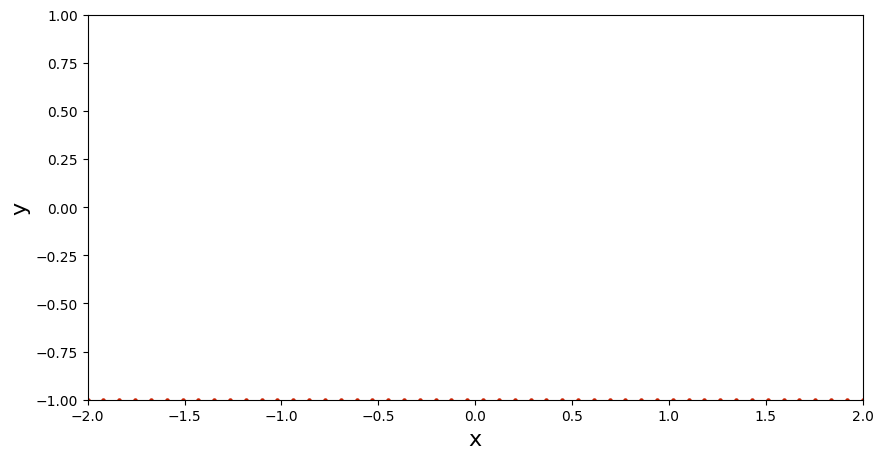

In [3]:
%matplotlib inline 

#ploting the grid 
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X[10], Y[0], s=5, color='#CD2305', marker='o')

In [4]:
source_strenght = 5
x_source, y_source = -1,-0.5

u_source = source_strenght/(2*math.pi)*(X-x_source)/((X-x_source)**2 + (Y-y_source)**2)
v_source = source_strenght/(2*math.pi)*(Y-y_source)/((X-x_source)**2 + (Y-y_source)**2)

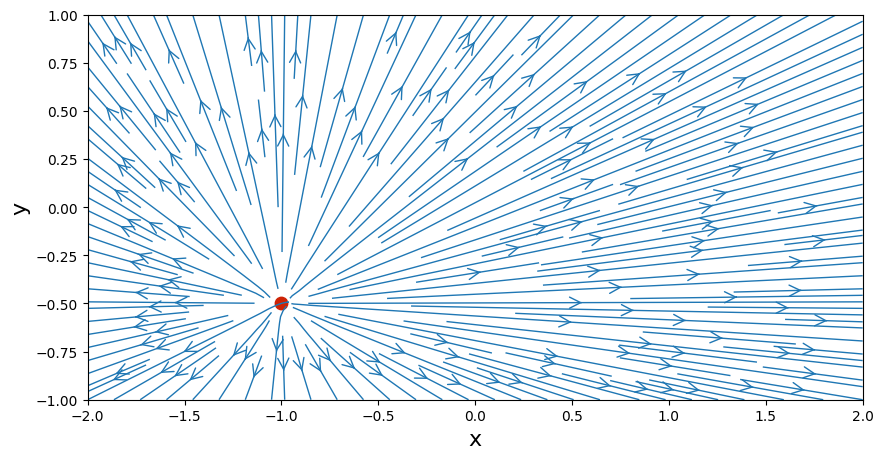

In [5]:
#streamline 
width = 10
height = (y_end-y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u_source,v_source,density=2, linewidth = 1, arrowsize=2, arrowstyle="->")
pyplot.scatter(x_source,y_source, color='#CD2305', s=80, marker='o');


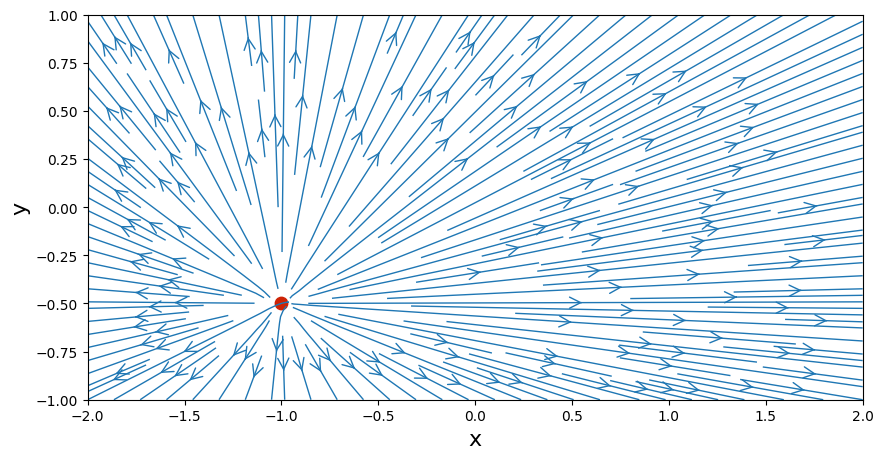

In [6]:
#streamline 
# u_source = u_source*0
width = 10
height = (y_end-y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u_source,v_source,density=2, linewidth = 1, arrowsize=2, arrowstyle="->")
pyplot.scatter(x_source,y_source, color='#CD2305', s=80, marker='o');

In [7]:
v_source[-1]

array([0.36728064, 0.385874  , 0.40461407, 0.42325754, 0.44151475,
       0.459053  , 0.47550419, 0.4904775 , 0.50357701, 0.51442363,
       0.52267955, 0.52807271, 0.53041829, 0.52963412, 0.52574779,
       0.51889424, 0.5093043 , 0.49728584, 0.48320044, 0.46743855,
       0.45039605, 0.43245428, 0.41396492, 0.39523981, 0.37654559,
       0.35810235, 0.34008516, 0.32262771, 0.30582715, 0.28974929,
       0.27443398, 0.25990003, 0.24614971, 0.23317259, 0.22094884,
       0.20945189, 0.19865065, 0.18851118, 0.17899806, 0.17007537,
       0.16170751, 0.15385968, 0.14649829, 0.13959124, 0.13310805,
       0.12701994, 0.12129988, 0.11592257, 0.11086437, 0.1061033 ])

In [8]:
u_dl = sum(u_source[-2] - u_source[1])/4 + sum(v_source[-2]-v_source[1])/2
u_dl

20.171149290564394

In [9]:
u_dl = sum(u_source[-2][1:-1] - u_source[1][1:-1])/4 + sum(v_source[-2][1:-1]-v_source[1][1:-1])/2
u_dl

19.67316263411971

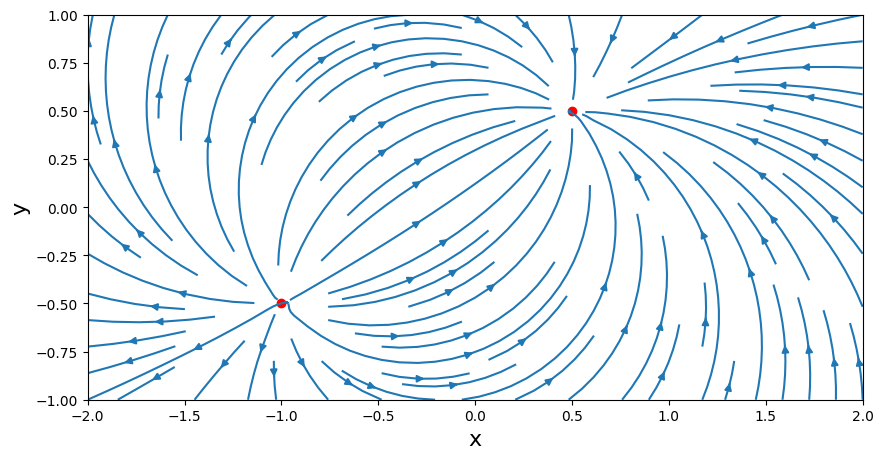

In [10]:
## Sink flow  - strength of the source is negative - thats all
sink_strength = -5
x_neg_source, y_neg_source  = 0.5, 0.5

un_source = sink_strength/(2*math.pi)*(X-x_neg_source)/((X-x_neg_source)**2 + (Y-y_neg_source)**2)
vn_source = sink_strength/(2*math.pi)*(Y-y_neg_source)/((X-x_neg_source)**2 + (Y-y_neg_source)**2)

U = u_source+un_source 
V = v_source + vn_source

pyplot.figure(figsize=(width,height))
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,U,V)
pyplot.scatter(x_source,y_source, color='red')
pyplot.scatter(x_neg_source,y_neg_source,color='red')



In [11]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

In [12]:
uinf = 1
v_inf = 0
N = 200
x_start,x_end = -4 , 4
y_start,y_end = -2 , 2
xs = np.linspace(x_start,x_end,N)
ys = np.linspace(y_start,y_end, N)

X,Y = np.meshgrid(xs,ys)

strength_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

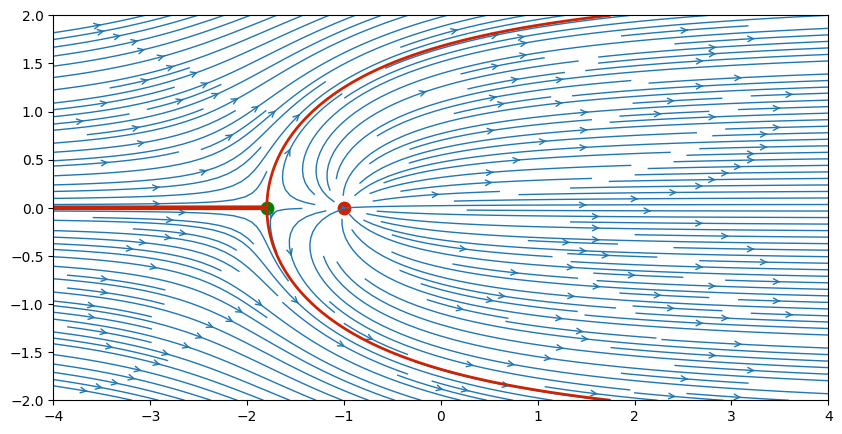

In [13]:


u_freestream = uinf*np.ones((N,N),dtype=float)
v_freestream = v_inf*np.ones((N,N), dtype=float)

psi_stream = u_freestream*Y

u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_stream + psi_source

#stagnation point - single point in the space
x_stag = x_source - strength_source/(2*np.pi*uinf)
y_stag = y_source

width = 10
height = (y_start - y_end)/(x_start-x_end)*width
pyplot.figure(figsize=(width,height))
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

pyplot.scatter(x_stag, y_stag, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');


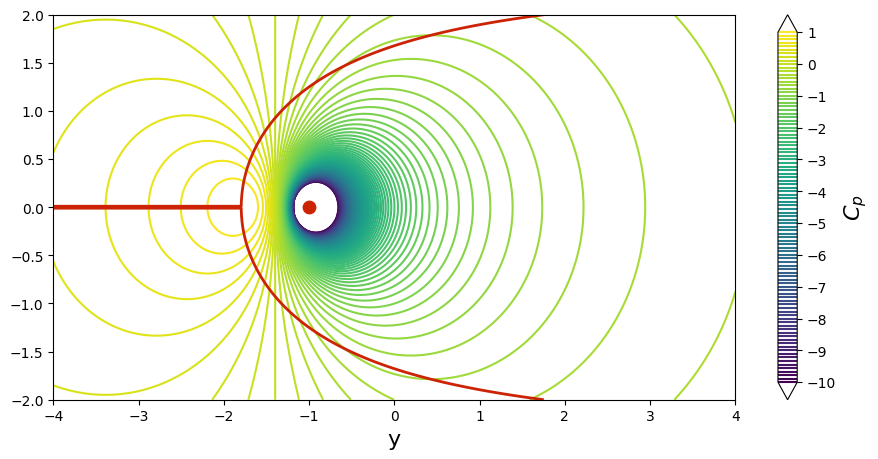

In [23]:
cp = 1 - (u**2 + v**2)/(uinf**2 + v_inf**2)

width = 10
height = (y_start - y_end)/(x_start-x_end)*width
pyplot.figure(figsize=(1.1*width,height))
pyplot.xlabel('x',fontsize=16)
pyplot.xlabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf = pyplot.contour(X,Y,cp,levels=np.linspace(-10,1,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.linspace(-10,1,12))
pyplot.scatter(x_source,y_source,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y, psi,
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');

Doublet 

In [26]:
kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0    # location of the doublet

def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [27]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

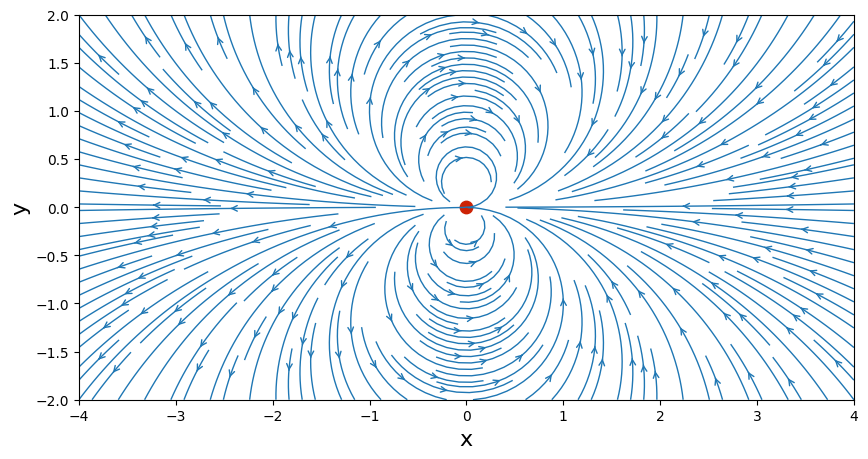

In [28]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

Vortex

In [29]:
gamma = 5.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    # location of the vortex

def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [30]:
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

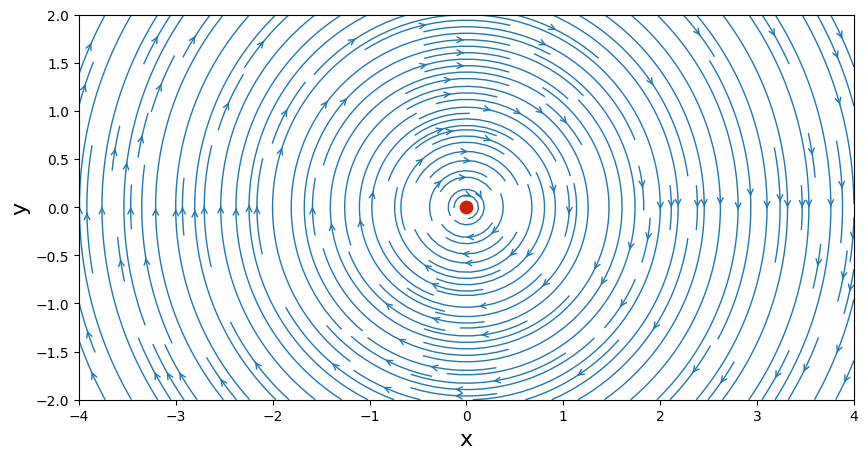

In [31]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');